<a href="https://colab.research.google.com/github/saigodha96/Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
import shap
from sklearn.linear_model import LogisticRegression

In [69]:
df = pd.read_csv("C:\\Users\\saiku\\Downloads\\Accusaga_DS_Assignment\\DS_dataset.csv")

In [70]:
df1 = df.copy()
#df = df1.copy()

In [71]:
df.shape

(30829, 7)

In [72]:
df.head

<bound method NDFrame.head of        Customer_ID    Var1    Var2 Group Category  Rating  \
0             5518  41.534  12.123    G1       C1  Bronze   
1            40515   9.445   0.256    G1       C1  Bronze   
2            52697  37.599   3.199    G1       C2    Gold   
3            68202  81.514   1.645    G1       C1  Silver   
4           130003  46.805   1.706    G1       C1  Silver   
...            ...     ...     ...   ...      ...     ...   
30824      7047231  12.094   0.899    G5       C3  Bronze   
30825      7079889  43.214   6.484    G5       C1  Bronze   
30826      7155901  20.902   6.159    G5       C1  Bronze   
30827      7180919  11.443   0.000    G5       C3  Bronze   
30828      7182208  18.485   0.164    G5       C4  Bronze   

       Purchased_ABC_product  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
30824               

# EDA

In [73]:
df.iloc[:,1:].describe()

,Var1,Var2,Purchased_ABC_product
count,30829.000000,30829.000000,30829.000000
mean,64.868318,4.994489,0.503552
std,114.373345,9.533546,0.499995
min,0.251000,0.000000,0.000000
25%,13.256000,0.668000,0.000000
50%,31.860000,2.189000,1.000000
75%,68.702000,5.482000,1.000000
max,2909.776000,317.380000,1.000000


In [74]:
df.isna().sum()# Getting the count of NULL values from each Column

Customer_ID              0
Var1                     0
Var2                     0
Group                    0
Category                 0
Rating                   0
Purchased_ABC_product    0
dtype: int64

### Plotting continuous data using distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


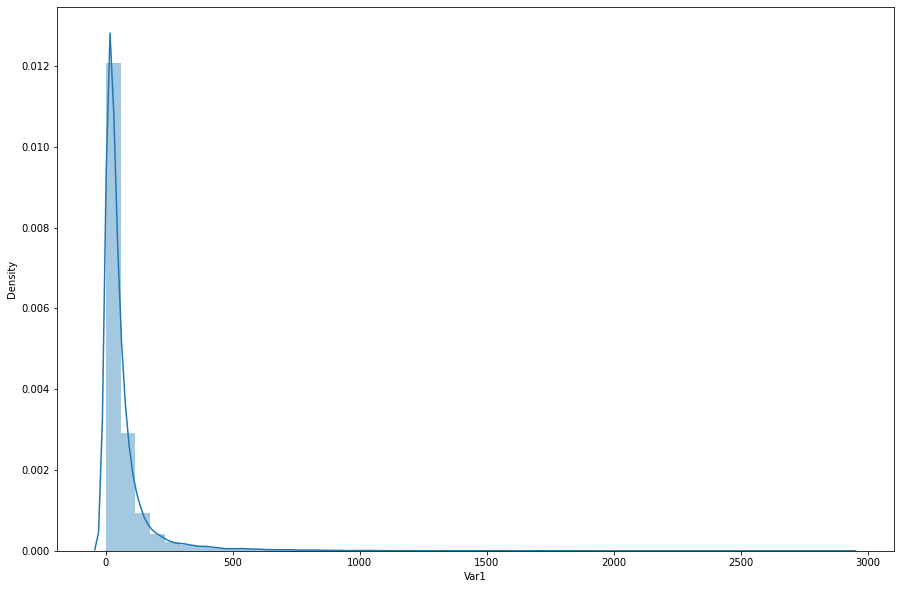

In [48]:
fig = plt.figure(figsize = (15, 10))
sn.distplot(df['Var1'])
plt.show()

We can observe that most data from Var1 is distributed between 0 to 500

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


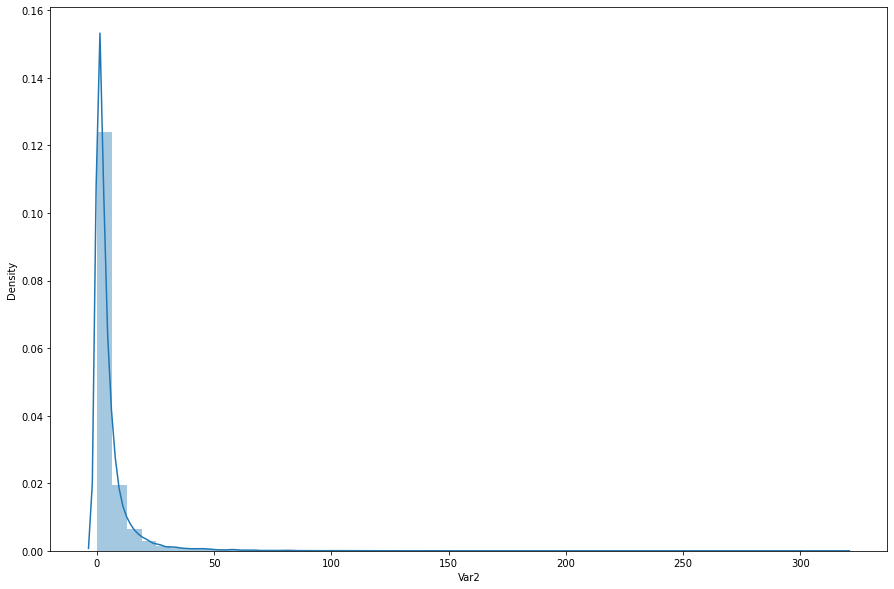

In [49]:
fig = plt.figure(figsize = (15, 10))
sn.distplot(df['Var2'])
plt.show()

We can observe that most data from Var2 is distributed between 0 to 50

In [20]:
# Splitting data in stratified fashion to train and test.
train_data, test_data = train_test_split(df, test_size = 0.3, stratify = df.Purchased_ABC_product)

### Plotting Discrete data using Bar and Pie charts

In [50]:
print(df['Group'].unique()) # Getting unique values from Group feature.

['G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8']


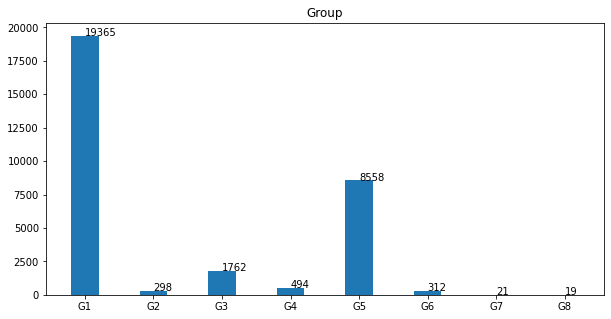

In [51]:
l1 = list(df['Group'])
y = np.array([l1.count('G1'),l1.count('G2'),l1.count('G3'),l1.count('G4'),l1.count('G5'),l1.count('G6'),l1.count('G7'),l1.count('G8')])
mylabels = ["G1", "G2","G3","G4","G5","G6","G7","G8"]
fig = plt.figure(figsize = (10, 5))
plt.bar(mylabels, y, width = 0.4, )
plt.title('Group')
for v in df['Group'].unique():
    plt.text(v, (df.Group == v).sum(), str((df.Group == v).sum()));
plt.show() 

We can observe that most data from in Group feature has values G1 and G5

In [52]:
print(df['Category'].unique())

['C1' 'C2' 'C3' 'C4' 'C5']


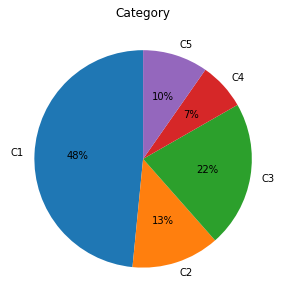

In [54]:
l1 = list(df['Category'])
y = np.array([l1.count('C1'),l1.count('C2'),l1.count('C3'),l1.count('C4'),l1.count('C5')])
mylabels = ["C1", "C2","C3","C4","C5"]
fig = plt.figure(figsize = (5, 5))
plt.pie(y, labels = mylabels, startangle=90, autopct='%1.0f%%')
plt.title('Category')
plt.show() 

We can observe that most data from in Category feature has most values as C1

In [55]:
print(df['Rating'].unique())

['Bronze' 'Gold' 'Silver']


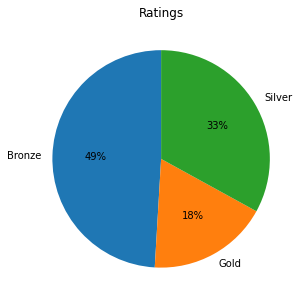

In [56]:
l1 = list(df['Rating'])
y = np.array([l1.count('Bronze'),l1.count('Gold'),l1.count('Silver')])
mylabels = ["Bronze", "Gold","Silver"]
fig = plt.figure(figsize = (5, 5))
plt.pie(y, labels = mylabels, startangle=90, autopct='%1.0f%%')
plt.title('Ratings')
plt.show() 

We can observe that most data from in Ratings feature has values Bronze

In [57]:
print(df['Purchased_ABC_product'].unique())

[0 1]


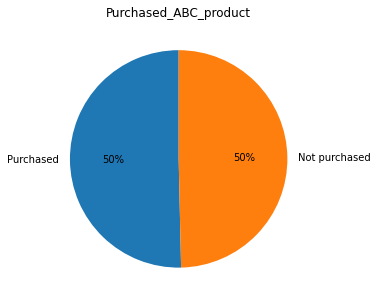

In [58]:
l1 = list(df['Purchased_ABC_product'])
y = np.array([l1.count(1),l1.count(0)])
mylabels = ["Purchased", "Not purchased"]
fig = plt.figure(figsize = (5, 5))
plt.pie(y, labels = mylabels, startangle=90, autopct='%1.0f%%')
plt.title('Purchased_ABC_product')
plt.show() 

We can observe that dependent variable named Purchased_ABC_product is equally distributed between classes

# Model Building

In [75]:
df.columns

Index(['Customer_ID', 'Var1', 'Var2', 'Group', 'Category', 'Rating',
       'Purchased_ABC_product'],
      dtype='object')

In [76]:
labelencoder = LabelEncoder()
df['Group']= labelencoder.fit_transform(df['Group'])
df['Category']= labelencoder.fit_transform(df['Category'])
df['Rating']= labelencoder.fit_transform(df['Rating'])

In [77]:
# Splitting data in stratified fashion to train and test.
train_data, test_data = train_test_split(df, test_size = 0.3, stratify = df.Purchased_ABC_product)

In [78]:
logit_model = sm.logit('Purchased_ABC_product ~ Var1 + Var2 + Group + Category + Rating', data = train_data).fit()
#Traing the model using the subset called train_data from the original dataset.

Optimization terminated successfully.
         Current function value: 0.519582
         Iterations 8


In [79]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:              Logit                 Pseudo R-squared: 0.250     
Dependent Variable: Purchased_ABC_product AIC:              22437.1622
Date:               2021-12-15 16:23      BIC:              22485.0393
No. Observations:   21580                 Log-Likelihood:   -11213.   
Df Model:           5                     LL-Null:          -14958.   
Df Residuals:       21574                 LLR p-value:      0.0000    
Converged:          1.0000                Scale:            1.0000    
No. Iterations:     8.0000                                            
------------------------------------------------------------------------
               Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------------
Intercept     -1.5470     0.0320   -48.3331   0.0000   -1.6097   -1.4843
Var1          -0.0001     0.0006    -0.2196   0.8262   -0.0014    0.0011
Var2           0.3751     0.0093    40.3190   0.0000    0.3569    0.3933
Group          0.0495     0.0090     5.5207   0.0000    0.0319    0.0670
Category       0.1439     0.0130    11.1028   0.0000    0.1185    0.1693
Rating         0.1889     0.0190     9.9535   0.0000    0.1517    0.2261
======================================================================

"""

In [80]:
pred = logit_model.predict(test_data.iloc[ :, 1:6 ]) #Predicting the purchase in form of probability

In [81]:
test_data["Probability"] = pred

In [82]:
test_data["test_pred"] = np.zeros(9249)

In [83]:
#taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1
test_data.loc[pred > 0.5, "test_pred"] = 1

In [84]:
test_data

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product,Probability,test_pred
29144,50380,31.952,3.575,0,0,0,0,0.447591,0.0
21769,4412405,47.316,9.200,4,0,0,0,0.890446,1.0
10547,2235422,101.345,16.058,4,4,1,1,0.995614,1.0
2541,2231784,40.628,5.858,0,4,0,1,0.772139,1.0
21191,2565063,24.287,3.591,0,0,0,1,0.449334,0.0
...,...,...,...,...,...,...,...,...,...
8613,1581877,512.241,18.184,2,1,1,1,0.996444,1.0
20019,6952656,7.285,0.000,4,0,0,0,0.205853,0.0
17055,1899353,526.011,27.545,2,1,1,1,0.999893,1.0
30494,7193573,31.049,5.168,4,2,0,1,0.705366,1.0


# Evaluating the model performance


***Confusion matrix***

The best way to evaluate classification problem is by using confusion matrix because it gives us a table which will tells us about True Positives, False Positives, True Negatives and False Negatives.

Using the values of that table we can find Accuracy, sensitivity and specificity.

In [85]:

confusion_matrix = pd.crosstab(test_data.test_pred, test_data['Purchased_ABC_product'])
confusion_matrix

Purchased_ABC_product,0,1
test_pred,,
0.0,3836,1557
1.0,756,3100


In [1]:
accuracy_test = (3836 + 3100)/(9249)
accuracy_test

0.7499189101524489

Our model has 75 percent accuracy

**ROC CURVE**

ROC curve tells about the model accuracy in graphical presentation.

ROC can also be considered as trade off between sensitivity and specificity.

Classifiers that have curves that are more top-left side are better.

Text(0, 0.5, 'True positive rate')

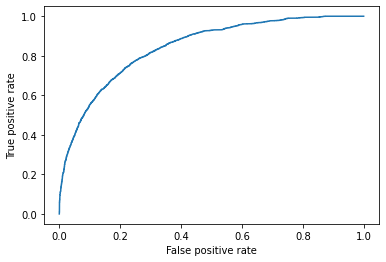

In [87]:
#ROC CURVE AND AUC
fpr, tpr, threshold = metrics.roc_curve(test_data["Purchased_ABC_product"], pred)

#PLOT OF ROC
plt.plot(fpr, tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [88]:
roc_auc_test = metrics.auc(fpr, tpr) 
roc_auc_test

0.8442547008774023

In [89]:
df.head(5)

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,0,0,0,0
1,40515,9.445,0.256,0,0,0,0
2,52697,37.599,3.199,0,1,1,0
3,68202,81.514,1.645,0,0,2,0
4,130003,46.805,1.706,0,0,2,0


# Feature Selection

It is done using several methods but now i am using correlation plot and Filter method using information gain. 

### Correlation Plot

It gives the correlation between each feature in data set in table formate

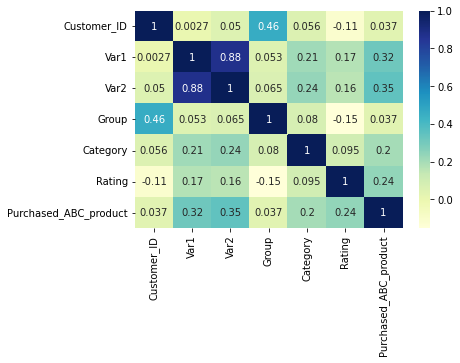

In [90]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

From the above plot we observe independent features Var1 and Var2 are heighly corelated between each other so we can remove any one of the feature.

In [91]:
df2 = df.copy()

In [92]:
df2.drop(['Var1'],axis = 1, inplace = True)

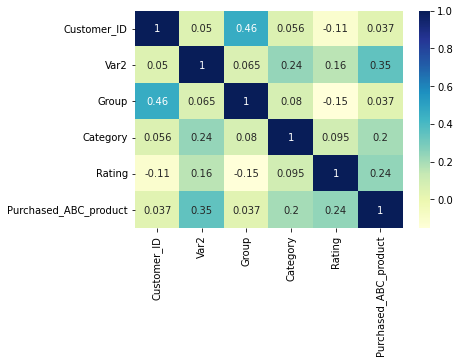

In [93]:
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu")
plt.show()

We can observe that independent feature Var2 has more corelation with dependent variable compared to other independent features.

### Filter method using Information gain

It measures the dependency between the variables. 
If two random variables are independent then they have less value otherwise they have high value.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


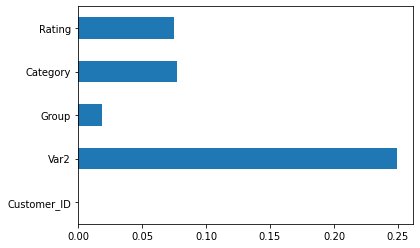

In [94]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(df2.iloc[:,0:len(df2.columns)-1],df2.iloc[:,len(df2.columns)-1:len(df2.columns)])
feat_importance = pd.Series(importance,df2.columns[0:len(df2.columns)-1])
feat_importance.plot(kind = 'barh')
plt.show()

***From both test we can say that Var2 has heighest influence on dependent variable.***

# Training model using SHAP values

SHAP values are calculated for each feature, for each value present, and approximate the contribution towards the output given by that data point.
It is used to know the feature which shows influence on output.

In [95]:
df = df1.copy()
model = LogisticRegression(random_state=0)

In [96]:
#splitting data
train_data, test_data = train_test_split(df, test_size = 0.3, stratify = df.Purchased_ABC_product)
train_data.shape

(21580, 7)

In [97]:
X_train = train_data.drop(['Purchased_ABC_product'], axis = 1)
y_train = train_data['Purchased_ABC_product']
X_test = test_data.drop(['Purchased_ABC_product'], axis = 1)

In [98]:
models = []
models.append(('LR',model))

### Preparing pipeline

In [100]:
cat_var = ['Group','Category','Rating']
con_var = ['Customer_ID','Var1','Var2']

In [101]:
scaler = StandardScaler()
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
feature = SelectFromModel(model, threshold=0.001)
ct = ColumnTransformer([('onehot', onehot, cat_var),
                        ('scaler', scaler, con_var)], remainder='passthrough', n_jobs=-1)

In [102]:
X = df.drop(['Purchased_ABC_product'], axis = 1)
Y = df["Purchased_ABC_product"]

In [103]:
results = []
names = []
for name, model in models:
    #pipe = Pipeline([('ct', ct), ('fselect', feature), (name, model)]) # including feature selection step using RF
    pipe = Pipeline([('ct', ct), (name, model)])
    scores = cross_val_score(pipe, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=0)
    names.append(name)
    results.append(scores)
    print("model %s accuracy: %.4f variance: %.4f"%(name, np.mean(scores), np.std(scores)))

model LR accuracy: 0.7460 variance: 0.0030


### Training Logistic for checking purchases

In [104]:
logr_pipe = Pipeline([('ct', ct), ('LR', model)])
logr_pipe.fit(X, Y)
trainpred = logr_pipe.predict(X)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [105]:
prediction = logr_pipe.predict(X_test)
sub =  pd.DataFrame()
sub["Purchase"] = prediction

### Getting list of new features after transformation

In [106]:
onehot_categories = logr_pipe.named_steps['ct'].transformers_[0][1].categories_
onehot_features = [f"{col}__{val}" for col, vals in zip(cat_var, onehot_categories) for val in vals]
all_features = onehot_features + con_var
print(all_features)

['Group__G1', 'Group__G2', 'Group__G3', 'Group__G4', 'Group__G5', 'Group__G6', 'Group__G7', 'Group__G8', 'Category__C1', 'Category__C2', 'Category__C3', 'Category__C4', 'Category__C5', 'Rating__Bronze', 'Rating__Gold', 'Rating__Silver', 'Customer_ID', 'Var1', 'Var2']


### creating a dataframe for the coefficients

In [107]:
coeff = pd.DataFrame(logr_pipe['LR'].coef_, columns=all_features)
coeff.T

,0
Group__G1,-0.017429
Group__G2,-0.167129
Group__G3,-0.002195
Group__G4,0.051652
Group__G5,0.228985
Group__G6,-0.066239
Group__G7,0.231625
Group__G8,-0.265246
Category__C1,-0.337577
Category__C2,-0.223872


### Model interpretation using Shap

In [108]:
pd.set_option("display.max_columns",None)
shap.initjs()


In [109]:
ct.fit(X)
X_shap = ct.fit_transform(X)
test_shap  = ct.transform(X_test)
explainer = shap.LinearExplainer(logr_pipe.named_steps['LR'], X_shap, feature_perturbation="interventional")#Linear Explainer for Logistic Regression
shap_values = explainer.shap_values(test_shap)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


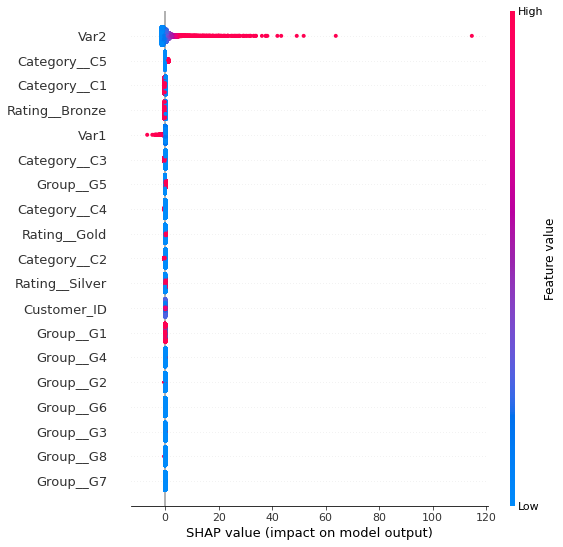

In [110]:
shap.summary_plot(shap_values, test_shap, feature_names=all_features)

***From SHAP also we found out that Var2 has more infleunce on Purchases***

# Identifing Group of customer to increase sales

In [112]:
df = df1.copy()
df.columns

Index(['Customer_ID', 'Var1', 'Var2', 'Group', 'Category', 'Rating',
       'Purchased_ABC_product'],
      dtype='object')

In [114]:
sum_df = df.groupby(by=['Group'])['Purchased_ABC_product'].sum()
sum_df

Group
G1    9230
G2      98
G3    1480
G4     228
G5    4336
G6     135
G7      12
G8       5
Name: Purchased_ABC_product, dtype: int64

We should consult groups G3 and G5 to increase sales.